## Importation des bibliotheques

In [ ]:
import os
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img , img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential



## Preparation des données

### Verification de la qualité des donnees

In [10]:

def verify_images(directory):
    bad_files = []
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        try:
            img = Image.open(file_path)
            img.verify()  # Vérifie l'intégrité du fichier
        except (IOError, SyntaxError) as e:
            print(f'Bad file found: {file_path}')
            bad_files.append(file_path)
    return bad_files


# Vérification des images dans les répertoires de chats et chiens
bad_files_cat = verify_images('/home/fallou/master 2/Vision Computer/TD_classification_image/archive/PetImages/Cat')
bad_files_dog = verify_images('/home/fallou/master 2/Vision Computer/TD_classification_image/archive/PetImages/Dog')

# Fusionner les listes de fichiers corrompus
bad_files = bad_files_cat + bad_files_dog

# Afficher la liste des fichiers corrompus
print(f"Total bad files: {len(bad_files)}")




Bad file found: /home/fallou/master 2/Vision Computer/TD_classification_image/archive/PetImages/Cat/666.jpg
Bad file found: /home/fallou/master 2/Vision Computer/TD_classification_image/archive/PetImages/Dog/11702.jpg
Total bad files: 2


### Suppression des donnees  de mauvais qualitées

In [11]:
def remove_bad_files(file_list):
    for file_path in file_list:
        try:
            os.remove(file_path)
            print(f'Removed file: {file_path}')
        except Exception as e:
            print(f'Error removing file {file_path}: {e}')

# Suppression des fichiers corrompus
remove_bad_files(bad_files)


Removed file: /home/fallou/master 2/Vision Computer/TD_classification_image/archive/PetImages/Cat/666.jpg
Removed file: /home/fallou/master 2/Vision Computer/TD_classification_image/archive/PetImages/Dog/11702.jpg


In [20]:

# Chemin vers les répertoires des images
train_dir = '/home/fallou/master 2/Vision Computer/TD_classification_image/archive/PetImages'

# Configuration du DataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% des données seront utilisées pour la validation
)

# Générateur de données d'entraînement
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

# Générateur de données de validation
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 20000 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.


In [16]:
class_names = list(train_generator.class_indices.keys())
print(class_names)


['Cat', 'Dog']


## Conception du modele CNN

In [34]:


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(512, activation='relu'),
    Dropout(0.5),

    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/home/fallou/anaconda3/envs/env_cv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

## Entrainement du modele

In [36]:

 
 
# Définition du modèle CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(512, activation='relu'),
    Dropout(0.5),

    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Calcul des steps_per_epoch et validation_steps
steps_per_epoch = train_generator.samples // BATCH_SIZE
validation_steps = validation_generator.samples // BATCH_SIZE

# Entraînement du modèle
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    epochs=20
)


Found 20000 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.
Epoch 1/20


/home/fallou/anaconda3/envs/env_cv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


384/625 ━━━━━━━━━━━━━━━━━━━━ 4:55 1s/step - accuracy: 0.5217 - loss: 0.6935

/home/fallou/anaconda3/envs/env_cv/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


625/625 ━━━━━━━━━━━━━━━━━━━━ 837s 1s/step - accuracy: 0.5474 - loss: 0.6803 - val_accuracy: 0.7346 - val_loss: 0.5448
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 168us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.2728
Epoch 3/20


2024-08-26 14:56:54.637974: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/home/fallou/anaconda3/envs/env_cv/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


625/625 ━━━━━━━━━━━━━━━━━━━━ 822s 1s/step - accuracy: 0.7493 - loss: 0.5172 - val_accuracy: 0.7963 - val_loss: 0.4330
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 125us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.9058
Epoch 5/20


2024-08-26 15:10:37.252102: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


625/625 ━━━━━━━━━━━━━━━━━━━━ 826s 1s/step - accuracy: 0.8038 - loss: 0.4231 - val_accuracy: 0.8111 - val_loss: 0.4105
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 174us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.5374
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 779s 1s/step - accuracy: 0.8334 - loss: 0.3616 - val_accuracy: 0.8518 - val_loss: 0.3471
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 125us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.2206
Epoch 9/20


2024-08-26 15:37:21.895017: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


625/625 ━━━━━━━━━━━━━━━━━━━━ 791s 1s/step - accuracy: 0.8756 - loss: 0.2860 - val_accuracy: 0.8480 - val_loss: 0.3386
Epoch 10/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 131us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8333 - val_loss: 0.2983
Epoch 11/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 815s 1s/step - accuracy: 0.9044 - loss: 0.2287 - val_accuracy: 0.8670 - val_loss: 0.3043
Epoch 12/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 131us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0888
Epoch 13/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 812s 1s/step - accuracy: 0.9233 - loss: 0.1837 - val_accuracy: 0.8584 - val_loss: 0.3747
Epoch 14/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 151us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.1047
Epoch 15/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 786s 1s/step - accuracy: 0.9408 - loss: 0.1406 - val_accuracy: 0.8750 - val_loss: 0.3633
Epoch 16/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 130us/step - accuracy: 0.0000e+

2024-08-26 16:30:46.040065: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


625/625 ━━━━━━━━━━━━━━━━━━━━ 810s 1s/step - accuracy: 0.9577 - loss: 0.1091 - val_accuracy: 0.8756 - val_loss: 0.3797
Epoch 18/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 136us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0816
Epoch 19/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 828s 1s/step - accuracy: 0.9696 - loss: 0.0729 - val_accuracy: 0.8694 - val_loss: 0.4691
Epoch 20/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8333 - val_loss: 0.8451


## Sauvegarde du modele

In [37]:
model.save('cats_vs_dogs_cnn_model.h5')

## Evaluation du modele

In [38]:
# Évaluation du modèle sur l'ensemble de validation
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_steps)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')


156/156 ━━━━━━━━━━━━━━━━━━━━ 50s 321ms/step - accuracy: 0.8684 - loss: 0.4706
Validation Loss: 0.4701172709465027
Validation Accuracy: 0.8691906929016113


## Test avec des images

In [40]:
 

def predict_image(model, img_path, target_size=(150, 150)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img) / 255.0  # Normalisation
    img_array = np.expand_dims(img_array, axis=0)  # Ajouter une dimension batch
    prediction = model.predict(img_array)
    
    if prediction[0] > 0.5:
        print(f"The image {os.path.basename(img_path)} is predicted as a Dog")
    else:
        print(f"The image {os.path.basename(img_path)} is predicted as a Cat")

# Exemple d'utilisation
test_image_paths = [
    '/home/fallou/master 2/Vision Computer/TD_classification_image/archive/PetImages/Cat/6.jpg',
    '/home/fallou/master 2/Vision Computer/TD_classification_image/archive/PetImages/Cat/17.jpg',
    '/home/fallou/master 2/Vision Computer/TD_classification_image/archive/PetImages/Dog/20.jpg'
]

for img_path in test_image_paths:
    predict_image(model, img_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
The image 6.jpg is predicted as a Cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
The image 17.jpg is predicted as a Cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
The image 20.jpg is predicted as a Dog


### Visualisation des predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


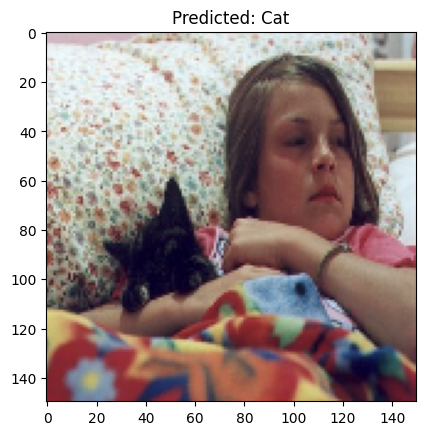

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


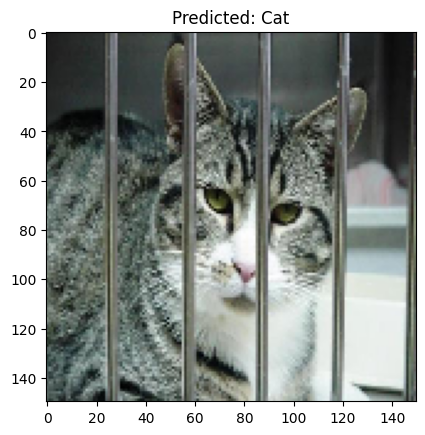

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


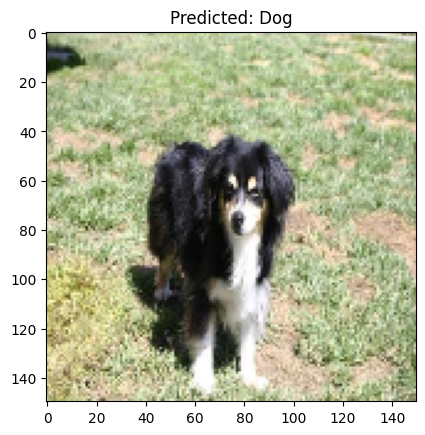

In [41]:
import matplotlib.pyplot as plt

def display_prediction(img_path, prediction):
    img = image.load_img(img_path, target_size=(150, 150))
    plt.imshow(img)
    plt.title(f"Predicted: {'Dog' if prediction > 0.5 else 'Cat'}")
    plt.show()

# Visualisation des images avec leurs prédictions
for img_path in test_image_paths:
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    display_prediction(img_path, prediction[0])
